In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import cv2

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# LOADING IN THE DATA

In [2]:
#Loading in the images
labels = ['id', 'passport']
img_size = 225
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype = 'object')

dataset = get_data(r'images/images')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

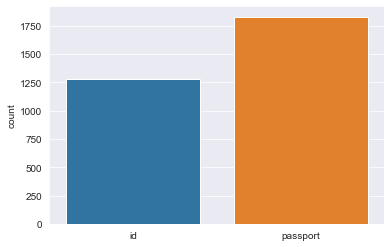

In [3]:
#Plotting the count of both of the dataset
l = []
for i in dataset:
    if(i[1] == 0):
        l.append("id")
    else:
        l.append("passport")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'id')

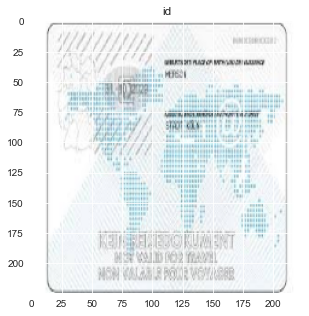

In [4]:
#Plotting one ID image
plt.figure(figsize = (5,5))
plt.imshow(dataset[1][0])
plt.title(labels[dataset[0][1]])

Text(0.5, 1.0, 'passport')

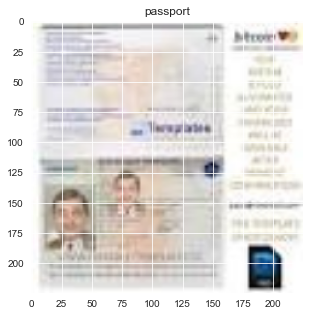

In [5]:
#Plotting one Passport image
plt.figure(figsize = (5,5))
plt.imshow(dataset[-1][0])
plt.title(labels[dataset[-1][1]])

# PREPROCESSING THE DATA

In [6]:
#Splitting the dataset into train set and validation set.
from sklearn.model_selection import train_test_split
X = []
y = []

for feature, label in dataset:
    X.append(feature)
    y.append(label)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Normalize the data
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255

X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [8]:
#Augmenting the training data
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# DEFINING, BUILDING AND TRAINING THE MODEL

In [9]:
#Defining the model
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(225,225,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [10]:
#Compiling the model using Adam
opt = Adam(learning_rate = 0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [11]:
#Training our model over 500 epochs
history = model.fit(X_train,y_train,epochs = 500 , batch_size = 30, validation_data = (X_val, y_val))

Epoch 1/500


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


70/70 [==============================] - 110s 1s/step - loss: 0.6895 - accuracy: 0.5679 - val_loss: 0.6886 - val_accuracy: 0.5609
Epoch 2/500
70/70 [==============================] - 97s 1s/step - loss: 0.6869 - accuracy: 0.5823 - val_loss: 0.6857 - val_accuracy: 0.5677
Epoch 3/500
70/70 [==============================] - 114s 2s/step - loss: 0.6827 - accuracy: 0.5966 - val_loss: 0.6822 - val_accuracy: 0.5716
Epoch 4/500
70/70 [==============================] - 99s 1s/step - loss: 0.6777 - accuracy: 0.6062 - val_loss: 0.6786 - val_accuracy: 0.5686
Epoch 5/500
70/70 [==============================] - 97s 1s/step - loss: 0.6731 - accuracy: 0.6048 - val_loss: 0.6748 - val_accuracy: 0.5901
Epoch 6/500
70/70 [==============================] - 97s 1s/step - loss: 0.6702 - accuracy: 0.6053 - val_loss: 0.6708 - val_accuracy: 0.5657
Epoch 7/500
70/70 [==============================] - 96s 1s/step - loss: 0.6651 - accuracy: 0.6005 - val_loss: 0.6666 - val_accuracy: 0.5686
Epoch 8/500
70/70 [====

70/70 [==============================] - 104s 1s/step - loss: 0.5033 - accuracy: 0.7281 - val_loss: 0.5466 - val_accuracy: 0.7059
Epoch 59/500
70/70 [==============================] - 99s 1s/step - loss: 0.5029 - accuracy: 0.7333 - val_loss: 0.5453 - val_accuracy: 0.7030
Epoch 60/500
70/70 [==============================] - 98s 1s/step - loss: 0.5037 - accuracy: 0.7319 - val_loss: 0.5443 - val_accuracy: 0.7059
Epoch 61/500
70/70 [==============================] - 98s 1s/step - loss: 0.4975 - accuracy: 0.7348 - val_loss: 0.5435 - val_accuracy: 0.7147
Epoch 62/500
70/70 [==============================] - 98s 1s/step - loss: 0.4994 - accuracy: 0.7357 - val_loss: 0.5417 - val_accuracy: 0.7020
Epoch 63/500
70/70 [==============================] - 105s 2s/step - loss: 0.4982 - accuracy: 0.7333 - val_loss: 0.5420 - val_accuracy: 0.6962
Epoch 64/500
70/70 [==============================] - 100s 1s/step - loss: 0.4954 - accuracy: 0.7439 - val_loss: 0.5409 - val_accuracy: 0.6962
Epoch 65/500
70/

70/70 [==============================] - 84s 1s/step - loss: 0.4391 - accuracy: 0.7751 - val_loss: 0.4980 - val_accuracy: 0.7274
Epoch 116/500
70/70 [==============================] - 95s 1s/step - loss: 0.4404 - accuracy: 0.7693 - val_loss: 0.4967 - val_accuracy: 0.7264
Epoch 117/500
70/70 [==============================] - 110s 2s/step - loss: 0.4345 - accuracy: 0.7885 - val_loss: 0.4999 - val_accuracy: 0.7352
Epoch 118/500
70/70 [==============================] - 99s 1s/step - loss: 0.4406 - accuracy: 0.7722 - val_loss: 0.4941 - val_accuracy: 0.7254
Epoch 119/500
70/70 [==============================] - 98s 1s/step - loss: 0.4357 - accuracy: 0.7712 - val_loss: 0.4950 - val_accuracy: 0.7313
Epoch 120/500
70/70 [==============================] - 98s 1s/step - loss: 0.4332 - accuracy: 0.7794 - val_loss: 0.4926 - val_accuracy: 0.7264
Epoch 121/500
70/70 [==============================] - 102s 1s/step - loss: 0.4326 - accuracy: 0.7775 - val_loss: 0.4924 - val_accuracy: 0.7293
Epoch 122/5

70/70 [==============================] - 100s 1s/step - loss: 0.3933 - accuracy: 0.8197 - val_loss: 0.4642 - val_accuracy: 0.7624
Epoch 173/500
70/70 [==============================] - 103s 1s/step - loss: 0.3917 - accuracy: 0.8134 - val_loss: 0.4629 - val_accuracy: 0.7653
Epoch 174/500
70/70 [==============================] - 98s 1s/step - loss: 0.3928 - accuracy: 0.8125 - val_loss: 0.4625 - val_accuracy: 0.7673
Epoch 175/500
70/70 [==============================] - 98s 1s/step - loss: 0.3926 - accuracy: 0.8153 - val_loss: 0.4620 - val_accuracy: 0.7644
Epoch 176/500
70/70 [==============================] - 99s 1s/step - loss: 0.3927 - accuracy: 0.8139 - val_loss: 0.4622 - val_accuracy: 0.7644
Epoch 177/500
70/70 [==============================] - 99s 1s/step - loss: 0.3890 - accuracy: 0.8192 - val_loss: 0.4618 - val_accuracy: 0.7634
Epoch 178/500
70/70 [==============================] - 101s 1s/step - loss: 0.3888 - accuracy: 0.8153 - val_loss: 0.4610 - val_accuracy: 0.7653
Epoch 179/

70/70 [==============================] - 97s 1s/step - loss: 0.3566 - accuracy: 0.8484 - val_loss: 0.4421 - val_accuracy: 0.7760
Epoch 230/500
70/70 [==============================] - 96s 1s/step - loss: 0.3561 - accuracy: 0.8360 - val_loss: 0.4447 - val_accuracy: 0.7712
Epoch 231/500
70/70 [==============================] - 96s 1s/step - loss: 0.3593 - accuracy: 0.8393 - val_loss: 0.4429 - val_accuracy: 0.7760
Epoch 232/500
70/70 [==============================] - 97s 1s/step - loss: 0.3581 - accuracy: 0.8331 - val_loss: 0.4413 - val_accuracy: 0.7751
Epoch 233/500
70/70 [==============================] - 97s 1s/step - loss: 0.3580 - accuracy: 0.8341 - val_loss: 0.4412 - val_accuracy: 0.7741
Epoch 234/500
70/70 [==============================] - 97s 1s/step - loss: 0.3578 - accuracy: 0.8417 - val_loss: 0.4407 - val_accuracy: 0.7780
Epoch 235/500
70/70 [==============================] - 97s 1s/step - loss: 0.3556 - accuracy: 0.8379 - val_loss: 0.4412 - val_accuracy: 0.7760
Epoch 236/500

70/70 [==============================] - 96s 1s/step - loss: 0.3297 - accuracy: 0.8566 - val_loss: 0.4281 - val_accuracy: 0.7858
Epoch 287/500
70/70 [==============================] - 96s 1s/step - loss: 0.3290 - accuracy: 0.8532 - val_loss: 0.4276 - val_accuracy: 0.7858
Epoch 288/500
70/70 [==============================] - 96s 1s/step - loss: 0.3288 - accuracy: 0.8537 - val_loss: 0.4269 - val_accuracy: 0.7887
Epoch 289/500
70/70 [==============================] - 96s 1s/step - loss: 0.3319 - accuracy: 0.8580 - val_loss: 0.4276 - val_accuracy: 0.7858
Epoch 290/500
70/70 [==============================] - 97s 1s/step - loss: 0.3320 - accuracy: 0.8513 - val_loss: 0.4266 - val_accuracy: 0.7887
Epoch 291/500
70/70 [==============================] - 97s 1s/step - loss: 0.3281 - accuracy: 0.8590 - val_loss: 0.4269 - val_accuracy: 0.7858
Epoch 292/500
70/70 [==============================] - 97s 1s/step - loss: 0.3280 - accuracy: 0.8556 - val_loss: 0.4282 - val_accuracy: 0.7770
Epoch 293/500

70/70 [==============================] - 97s 1s/step - loss: 0.3088 - accuracy: 0.8686 - val_loss: 0.4212 - val_accuracy: 0.7916
Epoch 344/500
70/70 [==============================] - 101s 1s/step - loss: 0.3080 - accuracy: 0.8676 - val_loss: 0.4197 - val_accuracy: 0.7945
Epoch 345/500
70/70 [==============================] - 98s 1s/step - loss: 0.3110 - accuracy: 0.8662 - val_loss: 0.4178 - val_accuracy: 0.7926
Epoch 346/500
70/70 [==============================] - 98s 1s/step - loss: 0.3051 - accuracy: 0.8686 - val_loss: 0.4166 - val_accuracy: 0.7965
Epoch 347/500
70/70 [==============================] - 101s 1s/step - loss: 0.3079 - accuracy: 0.8662 - val_loss: 0.4165 - val_accuracy: 0.7955
Epoch 348/500
70/70 [==============================] - 99s 1s/step - loss: 0.3110 - accuracy: 0.8604 - val_loss: 0.4173 - val_accuracy: 0.7936
Epoch 349/500
70/70 [==============================] - 97s 1s/step - loss: 0.3066 - accuracy: 0.8681 - val_loss: 0.4170 - val_accuracy: 0.7936
Epoch 350/5

70/70 [==============================] - 95s 1s/step - loss: 0.2884 - accuracy: 0.8815 - val_loss: 0.4095 - val_accuracy: 0.8023
Epoch 401/500
70/70 [==============================] - 94s 1s/step - loss: 0.2865 - accuracy: 0.8801 - val_loss: 0.4102 - val_accuracy: 0.8004
Epoch 402/500
70/70 [==============================] - 95s 1s/step - loss: 0.2856 - accuracy: 0.8796 - val_loss: 0.4097 - val_accuracy: 0.8004
Epoch 403/500
70/70 [==============================] - 90s 1s/step - loss: 0.2888 - accuracy: 0.8796 - val_loss: 0.4104 - val_accuracy: 0.8004
Epoch 404/500
70/70 [==============================] - 89s 1s/step - loss: 0.2893 - accuracy: 0.8849 - val_loss: 0.4104 - val_accuracy: 0.8004
Epoch 405/500
70/70 [==============================] - 90s 1s/step - loss: 0.2836 - accuracy: 0.8835 - val_loss: 0.4089 - val_accuracy: 0.8043
Epoch 406/500
70/70 [==============================] - 89s 1s/step - loss: 0.2871 - accuracy: 0.8825 - val_loss: 0.4134 - val_accuracy: 0.7965
Epoch 407/500

70/70 [==============================] - 90s 1s/step - loss: 0.2675 - accuracy: 0.8926 - val_loss: 0.4025 - val_accuracy: 0.8082
Epoch 458/500
70/70 [==============================] - 89s 1s/step - loss: 0.2713 - accuracy: 0.8878 - val_loss: 0.4025 - val_accuracy: 0.8062
Epoch 459/500
70/70 [==============================] - 89s 1s/step - loss: 0.2720 - accuracy: 0.8892 - val_loss: 0.4048 - val_accuracy: 0.8053
Epoch 460/500
70/70 [==============================] - 95s 1s/step - loss: 0.2676 - accuracy: 0.8959 - val_loss: 0.4017 - val_accuracy: 0.8062
Epoch 461/500
70/70 [==============================] - 85s 1s/step - loss: 0.2681 - accuracy: 0.8940 - val_loss: 0.4075 - val_accuracy: 0.7975
Epoch 462/500
70/70 [==============================] - 84s 1s/step - loss: 0.2686 - accuracy: 0.8926 - val_loss: 0.4118 - val_accuracy: 0.7936
Epoch 463/500
70/70 [==============================] - 85s 1s/step - loss: 0.2680 - accuracy: 0.8964 - val_loss: 0.4017 - val_accuracy: 0.8092
Epoch 464/500

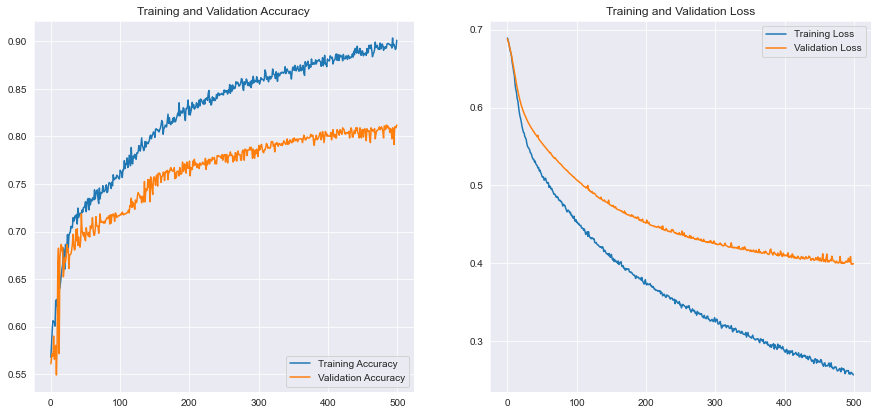

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('training and validation accuracy')
plt.show()
plt.

In [15]:
model.save('id passport classifier')

INFO:tensorflow:Assets written to: id passport classifier\assets
